In [1]:
import torch
import numpy as np

from torch import optim, nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset

import matplotlib.pyplot as plt

In [2]:
from tqdm import  notebook
from scipy import stats

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cpu = torch.device("cpu")
print(device)

cpu


## generate 500 test data

In [4]:
from scipy.stats import norm
def gen3(x,q):
  z=torch.from_numpy(norm.ppf(q)).float()
  muintermediate=torch.cos(x*2*2*3.14159)
  sdintermediate=(.2+.3*(muintermediate+1))
  y=muintermediate+sdintermediate*z
  return y,muintermediate,sdintermediate

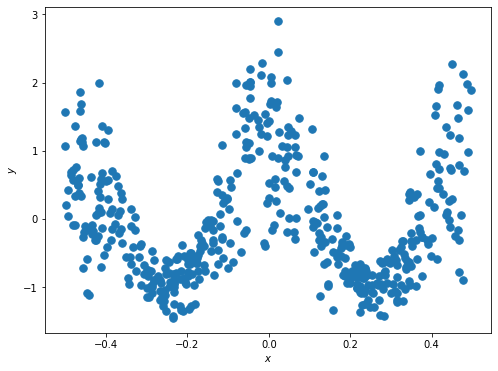

In [5]:

n=500
torch.manual_seed(521)
x=(torch.rand(n)-0.5).reshape(-1,1)
np.random.seed(42)
q=np.random.rand(n,1)
y,muout,sdout=gen3(x,q)
figure=plt.figure(figsize=[8,6])
plt.plot(x,y,'.',ms=15) 
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

### The true likelihood

In [6]:
low=np.quantile(y,0.05)
high=np.quantile(y,0.95)
itv=np.linspace(low,high,9)
itv=np.append(-np.infty,itv)
itv=np.append(itv,np.infty)
#outcome1 belongs to which interval
id=np.zeros(n)
for i in range(10):
    id=id+1*(y.numpy().ravel()>itv[i+1])
id=id.astype('int')


In [7]:
#calculate the likelihood for ground truth
loglikgth=np.empty([n])
for i in range(n):
    l=itv[id[i]]
    r=itv[id[i]+1]
    loglikgth[i]=np.log(stats.norm.cdf((r-muout[i])/sdout[i])-stats.norm.cdf((l-muout[i])/sdout[i])+1.e-10)

In [8]:
loglikgth.mean()

-1.6498998706390284

#### save the result

In [ ]:
lall=itv[id]
rall=itv[id+1]

In [ ]:
xlr=np.c_[x,lall,rall]

In [ ]:
np.save('xlr',xlr)